In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [123]:
features_df = pd.read_parquet("../data/contribution_data/extracted_features_v2.parquet")

In [124]:
#Shuffle the data entries
features_df = features_df.sample(frac=1, random_state=42).reset_index(drop=True)
features_df.head()

,user_id,user_edit_frequency,editor_used,area_delta,length_delta,area,length,bounding_box_size,geometry_valid,xmax,...,emergency,geological,healthcare,highway,historic,landuse,leisure,man_made,military,vandalism
0,1020680,1.329399,Level0 v1.2,1644,-216,1644,0,5.671549e-07,1,16.862373,...,0,0,0,0,0,1,0,0,0,False
1,1075986,0.495575,JOSM,117,0,117,0,3.177526e-08,1,5.159954,...,0,0,0,0,0,0,0,0,0,True
2,246941,61.000000,JOSM,0,0,0,0,0.000000e+00,1,1.646210,...,0,0,0,0,0,0,0,0,0,False
3,3392,8.180723,Potlatch 2,0,-205,0,210,3.094182e-07,1,-115.261025,...,0,0,0,1,0,0,0,0,0,True
4,1942179,2986.044444,,0,0,0,0,0.000000e+00,1,17.466017,...,0,0,0,0,0,0,0,0,0,True


In [125]:
if features_df.columns.__contains__('xzcode'):
    # Split 'xzcode' column into two separate columns 'code' and 'level'
    features_df[['code', 'level']] = pd.json_normalize(features_df['xzcode'])
    features_df.drop('xzcode', axis=1, inplace=True)
features_df.head()

,user_id,user_edit_frequency,editor_used,area_delta,length_delta,area,length,bounding_box_size,geometry_valid,xmax,...,healthcare,highway,historic,landuse,leisure,man_made,military,vandalism,code,level
0,1020680,1.329399,Level0 v1.2,1644,-216,1644,0,5.671549e-07,1,16.862373,...,0,0,0,1,0,0,0,False,5016864557,16
1,1075986,0.495575,JOSM,117,0,117,0,3.177526e-08,1,5.159954,...,0,0,0,0,0,0,0,True,5014238182,16
2,246941,61.000000,JOSM,0,0,0,0,0.000000e+00,1,1.646210,...,0,0,0,0,0,0,0,False,5011061704,16
3,3392,8.180723,Potlatch 2,0,-205,0,210,3.094182e-07,1,-115.261025,...,0,1,0,0,0,0,0,True,3184713878,16
4,1942179,2986.044444,,0,0,0,0,0.000000e+00,1,17.466017,...,0,0,0,0,0,0,0,True,5020807494,16


In [126]:
if features_df.columns.__contains__('geometry'):
    features_df.drop('geometry', axis=1, inplace=True)
    
if features_df.columns.__contains__('osm_id'):
    features_df.drop('osm_id', axis=1, inplace=True)
    
    
if features_df.columns.__contains__('members'):
    features_df.drop('members', axis=1, inplace=True)

if features_df.columns.__contains__('status'):
    features_df.drop('status', axis=1, inplace=True)
    
if features_df.columns.__contains__('editor_used'):
    features_df.drop('editor_used', axis=1, inplace=True)
    
features_df.head()

,user_id,user_edit_frequency,area_delta,length_delta,area,length,bounding_box_size,geometry_valid,xmax,xmin,...,healthcare,highway,historic,landuse,leisure,man_made,military,vandalism,code,level
0,1020680,1.329399,1644,-216,1644,0,5.671549e-07,1,16.862373,16.861237,...,0,0,0,1,0,0,0,False,5016864557,16
1,1075986,0.495575,117,0,117,0,3.177526e-08,1,5.159954,5.159741,...,0,0,0,0,0,0,0,True,5014238182,16
2,246941,61.000000,0,0,0,0,0.000000e+00,1,1.646210,1.646210,...,0,0,0,0,0,0,0,False,5011061704,16
3,3392,8.180723,0,-205,0,210,3.094182e-07,1,-115.261025,-115.261189,...,0,1,0,0,0,0,0,True,3184713878,16
4,1942179,2986.044444,0,0,0,0,0.000000e+00,1,17.466017,17.466017,...,0,0,0,0,0,0,0,True,5020807494,16


In [127]:
features_df.columns = features_df.columns.str.replace(' ', '_', regex=True)
features_df.head()

,user_id,user_edit_frequency,area_delta,length_delta,area,length,bounding_box_size,geometry_valid,xmax,xmin,...,healthcare,highway,historic,landuse,leisure,man_made,military,vandalism,code,level
0,1020680,1.329399,1644,-216,1644,0,5.671549e-07,1,16.862373,16.861237,...,0,0,0,1,0,0,0,False,5016864557,16
1,1075986,0.495575,117,0,117,0,3.177526e-08,1,5.159954,5.159741,...,0,0,0,0,0,0,0,True,5014238182,16
2,246941,61.000000,0,0,0,0,0.000000e+00,1,1.646210,1.646210,...,0,0,0,0,0,0,0,False,5011061704,16
3,3392,8.180723,0,-205,0,210,3.094182e-07,1,-115.261025,-115.261189,...,0,1,0,0,0,0,0,True,3184713878,16
4,1942179,2986.044444,0,0,0,0,0.000000e+00,1,17.466017,17.466017,...,0,0,0,0,0,0,0,True,5020807494,16


In [128]:
X = features_df.drop('vandalism', axis=1).copy()
X.head()

,user_id,user_edit_frequency,area_delta,length_delta,area,length,bounding_box_size,geometry_valid,xmax,xmin,...,geological,healthcare,highway,historic,landuse,leisure,man_made,military,code,level
0,1020680,1.329399,1644,-216,1644,0,5.671549e-07,1,16.862373,16.861237,...,0,0,0,0,1,0,0,0,5016864557,16
1,1075986,0.495575,117,0,117,0,3.177526e-08,1,5.159954,5.159741,...,0,0,0,0,0,0,0,0,5014238182,16
2,246941,61.000000,0,0,0,0,0.000000e+00,1,1.646210,1.646210,...,0,0,0,0,0,0,0,0,5011061704,16
3,3392,8.180723,0,-205,0,210,3.094182e-07,1,-115.261025,-115.261189,...,0,0,1,0,0,0,0,0,3184713878,16
4,1942179,2986.044444,0,0,0,0,0.000000e+00,1,17.466017,17.466017,...,0,0,0,0,0,0,0,0,5020807494,16


In [129]:
y = features_df['vandalism'].copy()
y.head()

0    False
1     True
2    False
3     True
4     True
Name: vandalism, dtype: bool

In [130]:
X_encoded = pd.get_dummies(X, columns=[
                                       'osm_type',
                                       'contribution_type',
                                       ])
X_encoded.head()

,user_id,user_edit_frequency,area_delta,length_delta,area,length,bounding_box_size,geometry_valid,xmax,xmin,...,level,osm_type_node,osm_type_relation,osm_type_way,contribution_type_CREATED,contribution_type_DELETED,contribution_type_GEOMETRY,contribution_type_NONE,contribution_type_TAG,contribution_type_TAG_GEOMETRY
0,1020680,1.329399,1644,-216,1644,0,5.671549e-07,1,16.862373,16.861237,...,16,False,False,True,False,False,False,False,False,True
1,1075986,0.495575,117,0,117,0,3.177526e-08,1,5.159954,5.159741,...,16,False,False,True,True,False,False,False,False,False
2,246941,61.000000,0,0,0,0,0.000000e+00,1,1.646210,1.646210,...,16,True,False,False,False,False,False,False,True,False
3,3392,8.180723,0,-205,0,210,3.094182e-07,1,-115.261025,-115.261189,...,16,False,False,True,False,False,True,False,False,False
4,1942179,2986.044444,0,0,0,0,0.000000e+00,1,17.466017,17.466017,...,16,True,False,False,True,False,False,False,False,False


In [131]:
assert X_encoded.dtypes.__contains__('object') == False

In [132]:
y = y.replace(True, 1)
y = y.replace(False, 0)

C:\Users\saise\AppData\Local\Temp\ipykernel_31544\3107921932.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(False, 0)


In [133]:
y.dtype

dtype('int64')

In [134]:
sum(y) / len(y)

0.6621638875411762

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.4, random_state=42, stratify=y)

In [136]:
# Get the shapes of the datasets
shapes = {
    'X_train shape': X_train.shape,
    'X_test shape': X_test.shape,
    'y_train shape': y_train.shape,
    'y_test shape': y_test.shape
}

# Convert shapes to DataFrame for better display
shapes_df = pd.DataFrame(shapes, index=['Number of Samples', 'Number of Features']).T
print(shapes_df)

               Number of Samples  Number of Features
X_train shape             281959                  59
X_test shape              187973                  59
y_train shape             281959              281959
y_test shape              187973              187973


In [137]:
# 1. Calculate the total number of samples in train and test sets
total_train = len(y_train)
total_test = len(y_test)

# 2. Calculate the number of vandalism (assuming 'vandalism' is labeled as 1)
vandalism_train = sum(y_train)
vandalism_test = sum(y_test)

# 3. Calculate the number of non-vandalism (assuming 'non-vandalism' is labeled as 0)
non_vandalism_train = total_train - vandalism_train
non_vandalism_test = total_test - vandalism_test

# 4. Print the statistics
print(f"Train Set Statistics:\n"
      f"Total: {total_train}\n"
      f"Vandalism: {vandalism_train}\n"
      f"Non-Vandalism: {non_vandalism_train}\n")

print(f"Test Set Statistics:\n"
      f"Total: {total_test}\n"
      f"Vandalism: {vandalism_test}\n"
      f"Non-Vandalism: {non_vandalism_test}\n")


Train Set Statistics:
Total: 281959
Vandalism: 186703
Non-Vandalism: 95256

Test Set Statistics:
Total: 187973
Vandalism: 124469
Non-Vandalism: 63504


In [138]:
sum(y_train)/len(y_train)

0.6621636479062559

In [139]:
sum(y_test)/len(y_test)

0.6621642469929192

In [140]:
# Define the file path for the hyperparameters JSON file
hyperparams_file = '../saved_parameters/best_hyperparameters.json'


In [141]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import os

# Check if the hyperparameters file exists
if not os.path.exists(hyperparams_file):
    # Define the parameter grid
    param_grid = {
        'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
        'max_depth': [3, 5, 7, 9],
        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
        'lambda': [0, 1, 3, 5, 10],
        'alpha': [0, 1, 2, 3, 5],
        'min_child_weight': [1, 3, 5, 7, 10],
        'gamma': [0, 0.1, 0.3, 0.5, 1, 2, 3],
        'n_estimators': [50, 60, 80, 100]  # Number of boosting rounds
    }

    # Initialize the XGBoost model
    xgb_model = xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='aucpr',
        use_label_encoder=False
    )

    # Set up RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_grid,
        n_iter=50,  # Number of different hyperparameter combinations to try
        scoring='roc_auc',  # AUC as the scoring metric
        cv=5,  # 5-fold cross-validation
        verbose=2,
        n_jobs=-1,  # Use all available cores
        random_state=42
    )

    # Run the randomized search
    random_search.fit(X_train, y_train)

    # Print the best parameters and best score
    print("Best Hyperparameters:", random_search.best_params_)
    print("Best AUC Score:", random_search.best_score_)


In [142]:
import json
import os

# Define the file path for the hyperparameters JSON file
hyperparams_file = '../saved_parameters/best_hyperparameters.json'

# Check if the hyperparameters file exists
if os.path.exists(hyperparams_file):
    # If it exists, load the best hyperparameters from the file
    with open(hyperparams_file, 'r') as f:
        best_params = json.load(f)
    print("Best Hyperparameters loaded from 'best_hyperparameters.json':", best_params)
else:
    # If it does not exist, retrieve the best hyperparameters from RandomizedSearchCV
    best_params = random_search.best_params_
    print("Best Hyperparameters:", best_params)

    # Save the Best Hyperparameters to a JSON file
    with open(hyperparams_file, 'w') as f:
        json.dump(best_params, f)

    print("Best hyperparameters saved to 'best_hyperparameters.json'")


Best Hyperparameters loaded from 'best_hyperparameters.json': {'subsample': 0.9, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 9, 'learning_rate': 0.3, 'lambda': 0, 'gamma': 2, 'colsample_bytree': 0.7, 'alpha': 0}


In [143]:
import xgboost as xgb

import json

with open('../saved_parameters/best_hyperparameters.json', 'r') as f:
    best_params = json.load(f)

# best_params['n_estimators'] = 20
# 2. Train the Final Model on the Full Training Data
final_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='aucpr',
    use_label_encoder=False,
    **best_params  # Set the best hyperparameters here
)
# Define evaluation sets (train and validation data)
eval_set = [(X_train, y_train), (X_test, y_test)]

# Fit the model and track evaluation metrics
final_model.fit(X_train, y_train, eval_set=eval_set, verbose=False)



C:\Users\saise\PycharmProjects\vandalism_detection_osm\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:48:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(alpha=0, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=2, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=0, learning_rate=0.3,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, ...)

In [144]:
# 1. Import necessary libraries for metrics
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, average_precision_score

# 2. Make predictions on both the train and test sets
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

# 3. Compute predicted probabilities for AUC and Precision-Recall
y_train_prob = final_model.predict_proba(X_train)[:, 1]
y_test_prob = final_model.predict_proba(X_test)[:, 1]  # This is used for ROC-AUC
y_test_pred_proba = final_model.predict_proba(X_test)[:, 1]  # Use this for AUC-PR

# 4. Calculate performance metrics for Train Set
print("Train Set Evaluation")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("AUC-ROC:", roc_auc_score(y_train, y_train_prob))
print("Classification Report (Train):\n", classification_report(y_train, y_train_pred))

# 5. Calculate performance metrics for Test Set
print("\nTest Set Evaluation")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_test_prob))
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred))


Train Set Evaluation
Accuracy: 0.9977053401381052
AUC-ROC: 0.9999475200736144
Classification Report (Train):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     95256
           1       1.00      1.00      1.00    186703

    accuracy                           1.00    281959
   macro avg       1.00      1.00      1.00    281959
weighted avg       1.00      1.00      1.00    281959


Test Set Evaluation
Accuracy: 0.9952280380692972
AUC-ROC: 0.9997874191409399
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     63504
           1       1.00      1.00      1.00    124469

    accuracy                           1.00    187973
   macro avg       0.99      1.00      0.99    187973
weighted avg       1.00      1.00      1.00    187973


In [145]:
# 3. Make Predictions on the Test Set
y_pred = y_test_pred
y_pred_proba = final_model.predict_proba(X_test)[:, 1]  # Get the probabilities for positive class


In [146]:
# 1. Calculate AUC-PR (Average Precision Score) and ROC-AUC Score
aucpr = average_precision_score(y_test, y_test_pred_proba)  # Use the defined probabilities
print(f"AUC-PR Score on Test Set: {aucpr}")

roc_auc = roc_auc_score(y_test, y_test_prob)
print(f"ROC-AUC Score on Test Set: {roc_auc}")

# 2. Generate Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)


AUC-PR Score on Test Set: 0.999897361318275
ROC-AUC Score on Test Set: 0.9997874191409399
Confusion Matrix:
[[ 63189    315]
 [   582 123887]]


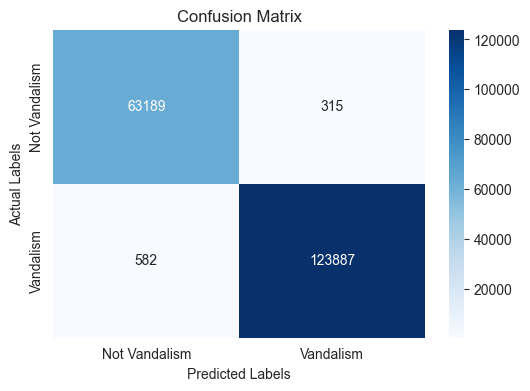

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define class names
class_names = ['Not Vandalism', 'Vandalism']

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()


In [148]:
import joblib

# 6. Save the Final Model for Future Use
joblib.dump(final_model, '../saved_parameters/final_xgboost_model.pkl')

# To Load the Model Later:
# final_model = joblib.load('final_xgboost_model.pkl')


['../saved_parameters/final_xgboost_model.pkl']